# Australian Automotive Market - Descriptive Analysis

In [1]:
# data

import pandas as pd
import numpy as np
from scipy.stats import variation 

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

We are going to analise the Australian Automotive Market with data extracted from the website Autotrader.com. The dataset's author doesn't provide the information about when this data was extracted.

We will try to answer these questions:

1. Do the outliers affect the correlation among the analysed elements?
1. What are the top 10 vehicles advertised?
2. What's the average mileage of these cars?
3. What's the average price of these cars?


## 1. Reading, visualising and describing the dataset

In [2]:
df = pd.read_csv('/content/cars.csv')

df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


<center> <b> Column meaning </b> </center>

---

**ID:** Vehicle number.

**Name:** Vehicle name.

**Price:** The price of the car.

**Brand:** The brand of the vehicle.

**Model:** Vehicle age.

**Variant:** Vehicle variant.

**Series:** Series of vehicles.

**Year:** Year of manufacture.

**Kilometers:** The number of kilometers the vehicle can run (new vehicles have this attribute 0).

**Type:** Vehicle type (Sedan, Wagon, Coupe,…).

**Gearbox:** Gearbox (Automatic, manual,…).

**Fuel:** Fuel (Oil, gasoline,…).

**Status:** Status (Used, tested,…).

**CC:** Segmentation.

**Color:** Car color.

**Seating Capacity:** Number of seats.

---

In [3]:
df.shape

(17048, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
df.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.488033,-0.447490
Year,0.488033,1.000000,-0.728515
Kilometers,-0.447490,-0.728515,1.000000


Text(0.5, 1.0, 'Confusion Matrix')

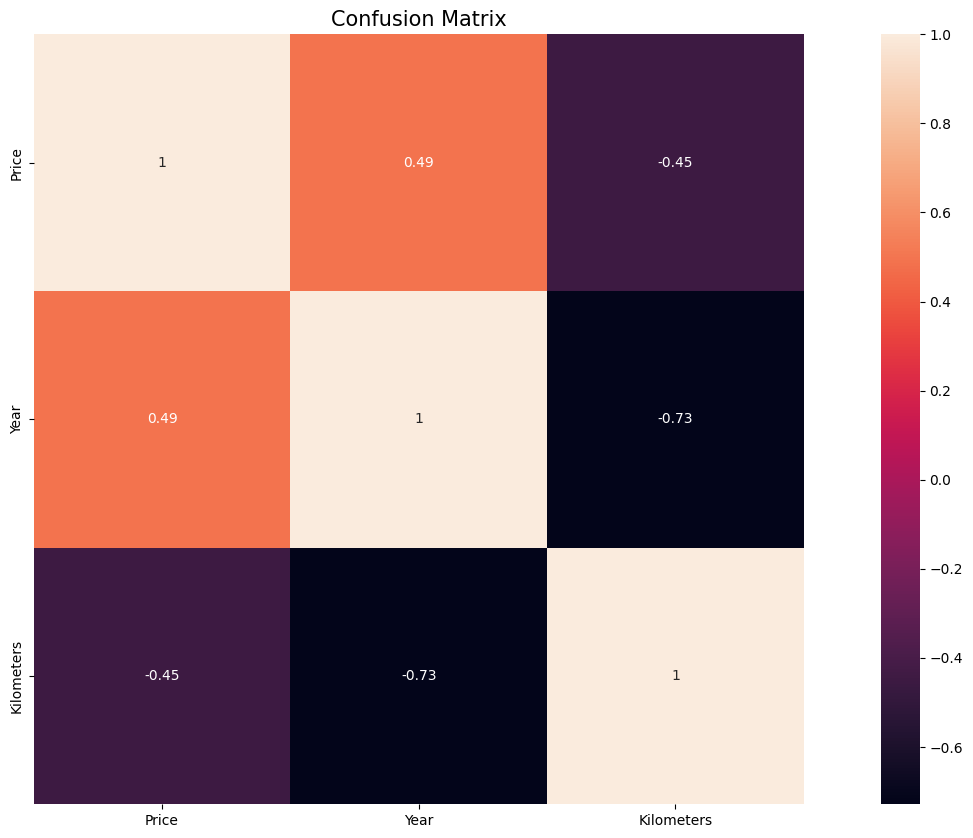

In [6]:
fig, axs = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.loc[:,['Price', 'Year', 'Kilometers']].corr(), square=True, annot=True)
plt.title('Confusion Matrix', fontsize=15)

**Observations:** we can get some interesting insights here:


1.   **Price x Year:** as expected, there's a positive correlation between Price and Year, which means that the newer the car is, the more expensive it tends to be. Although, this correlation is considered weak since it's lower than 0.5.
2.   **Price x Kilometers:** one more expected correlation, although it's not as high as expected. The more kilometers run, the lower the price, however, this is another weak correlation, since it's lower than 0.5.
3. **Kilometers x Year:** this negative correlation is the strongest among the others, and again, expected. The older the car, the more kilometers it has run.



In [7]:
# let's describe just the columns important to us, that is Price, Kilometers and Year

df.loc[:,['Price', 'Year', 'Kilometers']].describe().applymap(lambda x: f"{x:0.5f}")

,Price,Year,Kilometers
count,17048.00000,17048.00000,17048.00000
mean,36777.77804,2015.48129,103231.40169
std,30305.01533,4.72159,80413.13148
min,1000.00000,1989.00000,1.00000
25%,18800.00000,2013.00000,44502.25000
50%,29990.00000,2016.00000,88454.00000
75%,45990.00000,2019.00000,148873.50000
max,999000.00000,2022.00000,2700000.00000


We can see that the Standard Deviation in Price and Kilometers are very high, which can indicate that we may have outliers in this dataset that may affect our analysis.

In order to check out, we're going to take a closer look at the:

1. Median: if the mean is distant from the median, we can have a better understanding of the dataset. If the mean is higher, it means that the top values a more distant from the centre of the distribution. If the mean is lower than the median, it means that the bottom values are more distant than the top values
2. Coefficient of Variation: to analyze the degree of dispersion of a data set

In [8]:
# median

df.loc[:,['Price', 'Year', 'Kilometers']].median()

Price         29990.0
Year           2016.0
Kilometers    88454.0
dtype: float64

In [9]:
# Coefficient of Variation

variation(df.loc[:,['Price', 'Year', 'Kilometers']])

array([0.82397926, 0.00234259, 0.77893714])

We can see that the mean is greater than the median, which means that we have numbers at the top of the dataset pulling the mean higher, causing anomalies in the results and getting in the way of the analysis.

In addition, the coefficient of variation is extremely high, reinforcing what was shown in the comparison between the mean and median, which means that we have a high variability in the data.

Let's see the data in a boxplot to better visualise it.

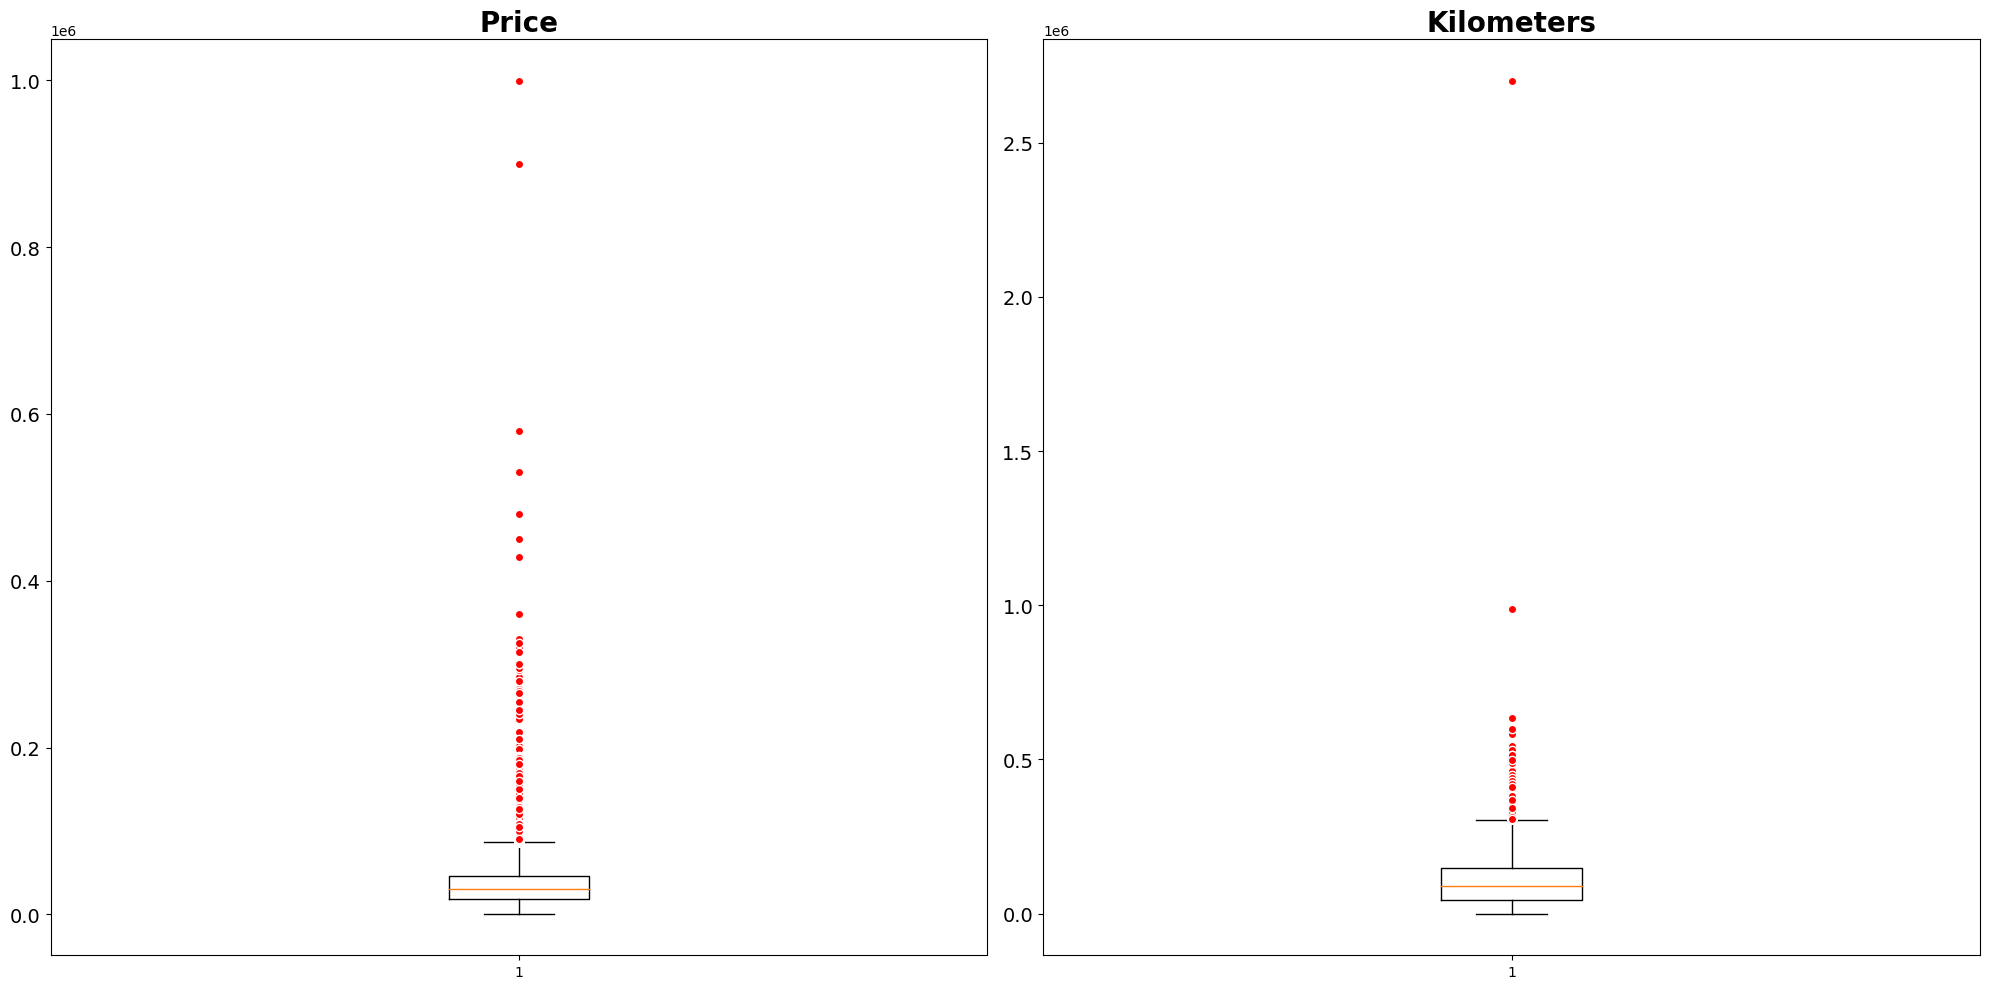

In [10]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fix, axs = plt.subplots(1,2, figsize=(20,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.loc[:,['Price', 'Kilometers']].iloc[:,i], flierprops=red_circle)
  ax.set_title(df.loc[:,['Price', 'Kilometers']].columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

Taking into account that the scale is in a million, we have cars with a price of almost a million and cars that have run more than 2 million kilometres. 

Would this be really true? 2 million kilometres seems a lot for a car to run.

We will check it after and see if it seems really right. If it's not, we will take it off and filter properly the dataset.

First, since we are looking for the used cars, we will filter them and analyse them separated.

## 2. Used cars

As I am looking for the used cars, let's create another dataframe just with the used cars to see if we have differences in the analysis done before.

In [11]:
UsedCars = df.copy()

UsedCars = UsedCars[UsedCars['Status'] == 'Used']

UsedCars

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity


For some reason, it didn't work. Let's investigate to see what can be the problem.

In [12]:
UsedCars = df.copy()

UsedCars.Status[0]

' Used'

Now we can see what is the problem, there's a space before the word "Used", so it's not filtering properly.

We will have to strip all the existing spaces to ensure the filter works correctly.

In [13]:
UsedCars = df.copy()

UsedCars.Status = UsedCars.Status.str.strip()

UsedCars.Status[0]

'Used'

Now we can begin our analysis:

In [14]:
UsedCars = UsedCars[UsedCars['Status'] == 'Used']

UsedCars

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,12366036,2017 Nissan X-Trail ST (4WD) T32 Series 2,26800,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
6,12370057,2016 Ford Territory TX (rwd) SZ MK2,23990,Ford,Territory,TX (rwd),SZ MK2,2016,154136,Wagon,Automatic,Diesel,Used,2720,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [15]:
UsedCars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16304 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                16304 non-null  int64 
 1   Name              16304 non-null  object
 2   Price             16304 non-null  int64 
 3   Brand             16304 non-null  object
 4   Model             16304 non-null  object
 5   Variant           16304 non-null  object
 6   Series            16304 non-null  object
 7   Year              16304 non-null  int64 
 8   Kilometers        16304 non-null  int64 
 9   Type              16304 non-null  object
 10  Gearbox           16304 non-null  object
 11  Fuel              16304 non-null  object
 12  Status            16304 non-null  object
 13  CC                16304 non-null  int64 
 14  Color             16304 non-null  object
 15  Seating Capacity  16304 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [16]:
UsedCars.loc[:,['Price', 'Year', 'Kilometers']].describe().applymap(lambda x: f"{x:0.5f}")

,Price,Year,Kilometers
count,16304.00000,16304.00000,16304.00000
mean,35638.70725,2015.19492,107796.91198
std,29747.38417,4.61934,79181.72872
min,1000.00000,1989.00000,5.00000
25%,17990.00000,2013.00000,50585.25000
50%,29888.00000,2016.00000,92488.50000
75%,44405.00000,2018.00000,152000.00000
max,999000.00000,2022.00000,2700000.00000


In [17]:
# Median

UsedCars.loc[:, ['Price', 'Year', 'Kilometers']].median()

Price         29888.0
Year           2016.0
Kilometers    92488.5
dtype: float64

In [18]:
# Coefficient of Variation

variation(UsedCars.loc[:,['Price', 'Year', 'Kilometers']])

array([0.83466753, 0.00229219, 0.7345229 ])

The numbers decreased a little bit but didn't cause any major effects, even because the number of used cars represent the majority of the data set.

The Coefficient of Variation of the Price increased a little while the Kilometers decreased.

Before filtering, there were 17048 cars and after filtering the number is 16304, a porcentage of:

In [19]:
(UsedCars.ID.count()/df.ID.count()*100).round(2)

95.64

In [20]:
UsedCars.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.474708,-0.431873
Year,0.474708,1.000000,-0.705814
Kilometers,-0.431873,-0.705814,1.000000


**Observation:** The correlation among the used cars decreased in all cases

## 3. Questions

### 3.1. Do the outliers affect the correlation among the analysed elements?

Let's check if the the detected outliers affect the correlation among the elements analysed in this project, that is, among the used cars.


To procede with this approach, we need to delete the outliers from the dataset. For this we will need calculate the lower and upper limits to be able to filter the data based on this number.

We will be using the **IQR** (Inter Quartile Range) approach. The IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.


```
IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR) 
```


In [21]:
# detecting the outliers for both Kilometers and Price

Q1_KM = UsedCars['Kilometers'].quantile(0.25)
Q1_Price = UsedCars['Price'].quantile(0.25)

Q3_KM = UsedCars['Kilometers'].quantile(0.75)
Q3_Price = UsedCars['Price'].quantile(0.75)

IQR_KM = Q3_KM - Q1_KM
IQR_Price = Q3_Price - Q1_Price

upper_KM = Q3_KM + (1.5 * IQR_KM)
upper_Price = Q3_Price + (1.5 * IQR_Price)

lower_KM = Q1_KM - (1.5 * IQR_KM)
lower_Price = Q1_Price - (1.5 * IQR_Price)

# creating the variable with the whole data set taking off the outliers

UsedCars_no_outliers = UsedCars[(UsedCars['Kilometers'] <= upper_KM) & 
                                (UsedCars['Kilometers'] >= lower_KM)]

UsedCars_no_outliers = UsedCars_no_outliers[(UsedCars_no_outliers['Price'] <= upper_Price) & 
                                            (UsedCars_no_outliers['Price'] >= lower_Price)]

print(f'We have {UsedCars.shape[0] - UsedCars_no_outliers.shape[0]} outliers in this dataset!')

We have 1026 outliers in this dataset!


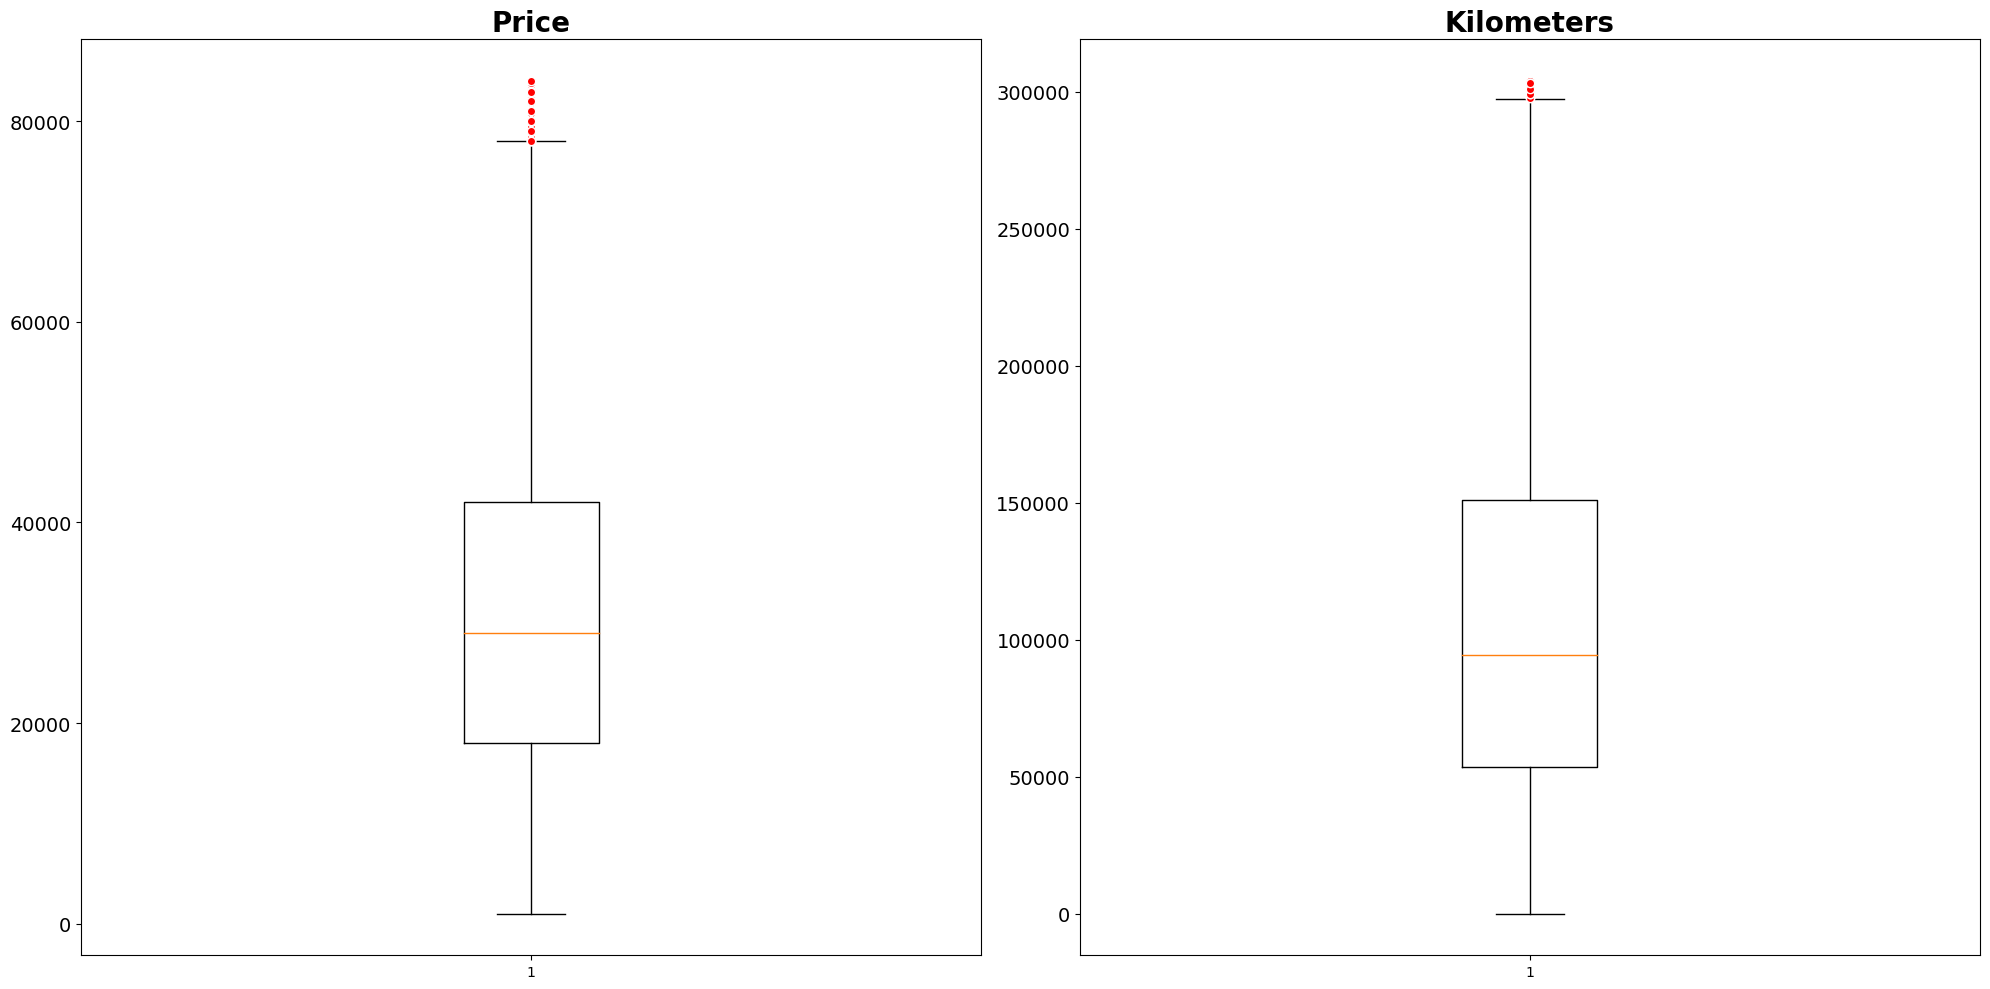

In [22]:
# let's visualise the boxplot for both Kilometers and Price now that we took the  outliers off

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fix, axs = plt.subplots(1,2, figsize=(20,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(UsedCars_no_outliers.loc[:,['Price', 'Kilometers']].iloc[:,i], flierprops=red_circle)
  ax.set_title(UsedCars_no_outliers.loc[:,['Price', 'Kilometers']].columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

In [23]:
# once we have our new dataset, let's check the correlation

UsedCars_no_outliers.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.642368,-0.559766
Year,0.642368,1.000000,-0.712130
Kilometers,-0.559766,-0.712130,1.000000


It is clear that the correlation among the features is higher now and it's being shown with a stronger correlation than before. Let's see below how it was before, with the outliers:

In [24]:
UsedCars.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,1.000000,0.474708,-0.431873
Year,0.474708,1.000000,-0.705814
Kilometers,-0.431873,-0.705814,1.000000


In [25]:
# let's see how they changed

UsedCars_no_outliers.loc[:,['Price', 'Year', 'Kilometers']].corr() - UsedCars.loc[:,['Price', 'Year', 'Kilometers']].corr()

,Price,Year,Kilometers
Price,0.000000,0.167661,-0.127894
Year,0.167661,0.000000,-0.006316
Kilometers,-0.127894,-0.006316,0.000000


There was an increase of at least 0.128 and the highest increase was between Price and Year (0.167661).

### 3.2. What are the top 10 vehicles advertised?

Since my budget is up to $5.000, I will analyse either the number of sold cars with no limitation on budget and with limitation on budget.

#### 3.2.1. With no budget limitation

##### 3.2.1.1. With outliers

In [26]:
# with no limitation and outliers

UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10)

Brand       Model    
Ford        Ranger       648
Toyota      Hilux        539
Holden      Commodore    491
Mitsubishi  Triton       362
Toyota      Corolla      355
            RAV4         307
Nissan      Navara       298
Holden      Colorado     279
Nissan      X-Trail      272
Mazda       3            271
Name: ID, dtype: int64

In [27]:
# Let's visualise these 10 cars in a bar chart

# getting all brands and models to filter the data set
brands_outliers = [x[0] for x in UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]
models_outliers = [x[1] for x in UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_NoLimit = UsedCars[(UsedCars['Brand'].isin(brands_outliers)) & (UsedCars['Model'].isin(models_outliers))]

PlotDF = Top10_NoLimit.copy()

# creating a new colunm with the brand and model together
PlotDF['Brand_Model'] = PlotDF[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
PlotDF = PlotDF[['Brand_Model', 'Year']]

# grouping the dataset and adding a colunm with the amount of cars per brand/model and Year
PlotDF = PlotDF.groupby(['Brand_Model', 'Year']).size().reset_index(name='Count')

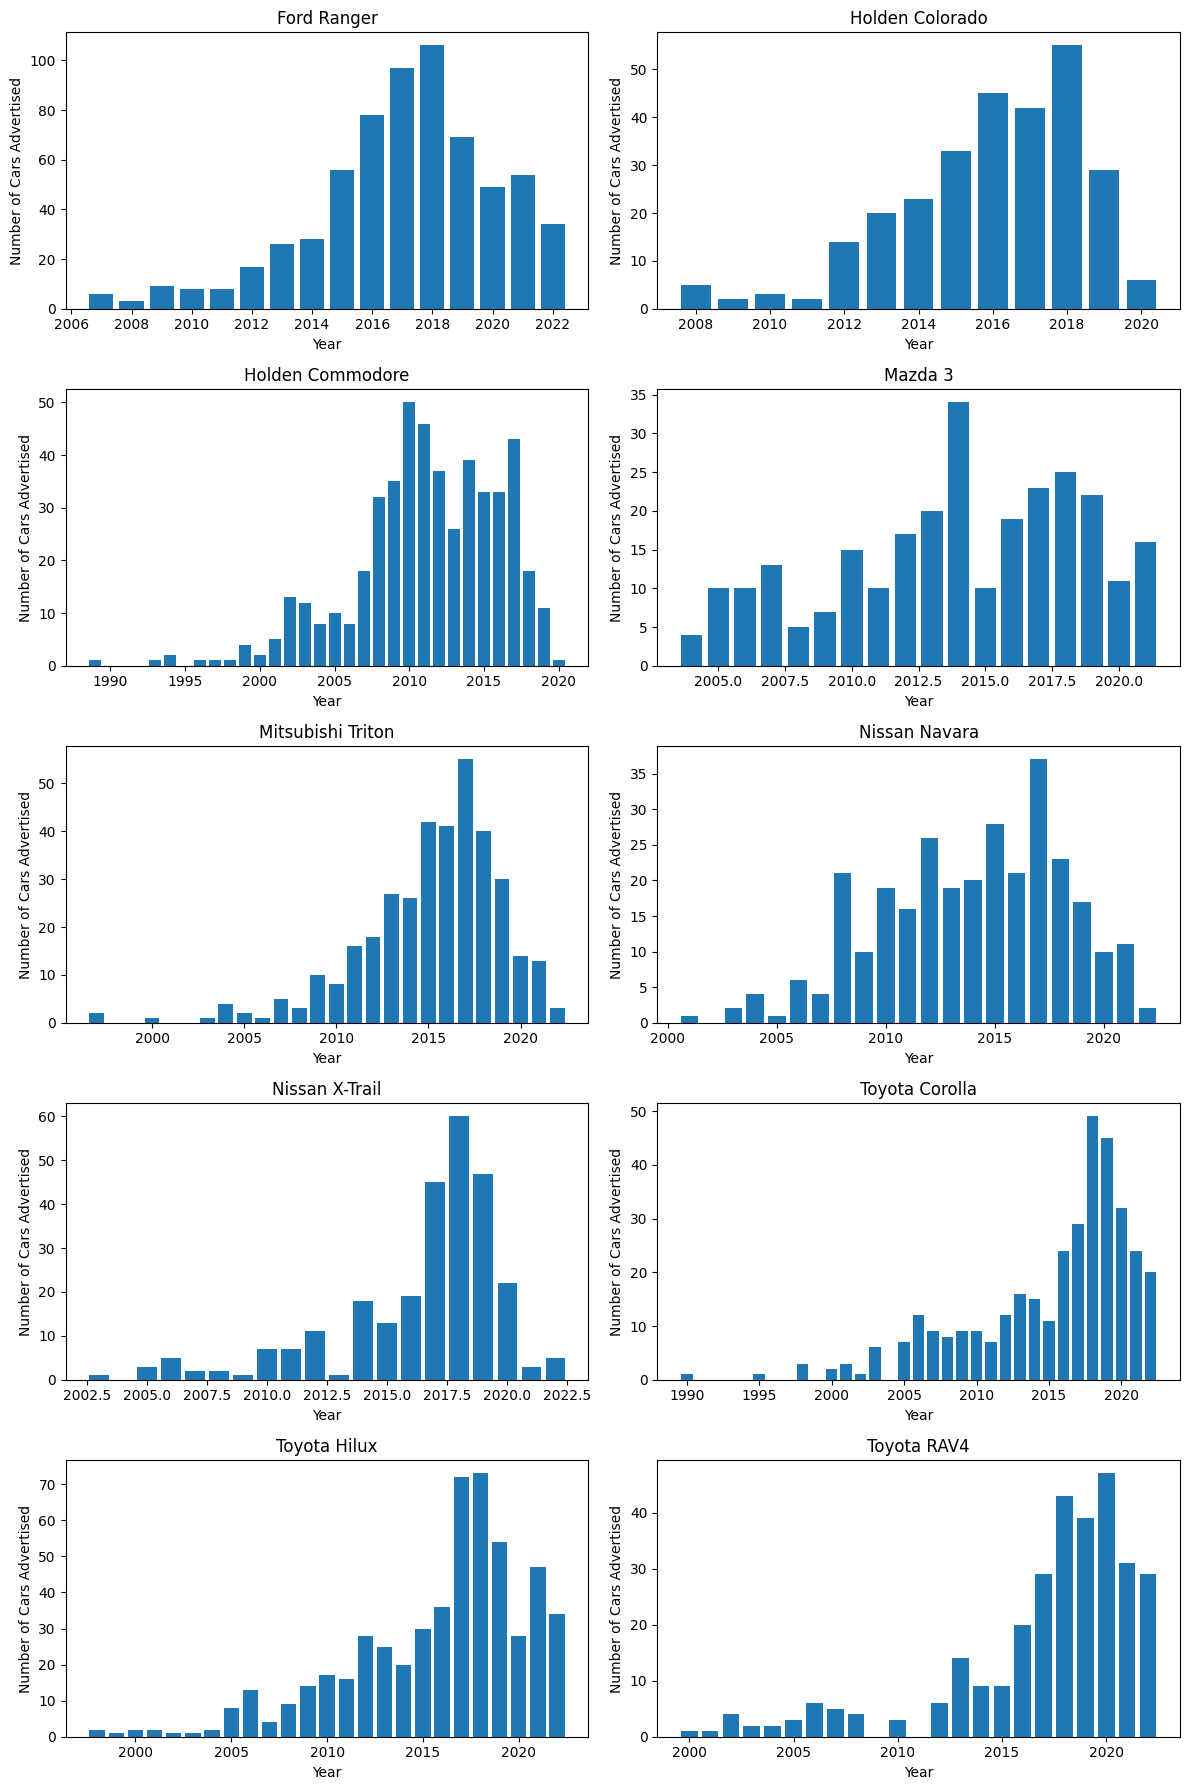

In [28]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(PlotDF['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = PlotDF[PlotDF['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Count'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Number of Cars Advertised')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.2.1.2. Without outliers

In [29]:
# getting all brands and models to filter the data set
brands_no_outliers = [x[0] for x in UsedCars_no_outliers.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]
models_no_outliers = [x[1] for x in UsedCars_no_outliers.groupby(['Brand','Model'])['ID'].size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_NoLimit_NoOutliers = UsedCars_no_outliers[(UsedCars_no_outliers['Brand'].isin(brands_no_outliers)) & 
                                                 (UsedCars_no_outliers['Model'].isin(models_no_outliers))]

# with no limitation and no outliers

UsedCars_no_outliers.groupby(['Brand','Model'])['ID'].size().nlargest(10)

Brand       Model    
Ford        Ranger       627
Toyota      Hilux        504
Holden      Commodore    477
Toyota      Corolla      351
Mitsubishi  Triton       340
Toyota      RAV4         303
Nissan      Navara       281
Holden      Colorado     275
Nissan      X-Trail      272
Mazda       3            270
Name: ID, dtype: int64

##### 3.2.1.3. What's the difference between them?

It appears that the cars have remained unchanged, although there seems to be a slight decrease in their quantity. The comparison between them is outlined below.

In [30]:
(UsedCars.groupby(['Brand','Model'])['ID'].size().nlargest(10) -
UsedCars_no_outliers.groupby(['Brand','Model'])['ID'].size().nlargest(10)).sort_values(ascending=False)

Brand       Model    
Toyota      Hilux        35
Mitsubishi  Triton       22
Ford        Ranger       21
Nissan      Navara       17
Holden      Commodore    14
            Colorado      4
Toyota      Corolla       4
            RAV4          4
Mazda       3             1
Nissan      X-Trail       0
Name: ID, dtype: int64

#### 3.2.2. With budget limitation

##### 3.2.2.1. With outliers

In [31]:
# with limitation and oultilers

UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10)

Brand       Model    
Holden      Commodore    22
Toyota      Camry        11
            Corolla      11
Ford        Falcon       10
Mitsubishi  Lancer       10
Mazda       3             9
Nissan      Pulsar        9
Holden      Astra         8
Ford        Focus         7
Honda       Civic         7
dtype: int64

In [32]:
# Let's visualise these 10 cars in a bar chart

# getting all brands and models to filter the data set
brands_limit_outliers = [x[0] for x in UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]
models_limit_outliers = [x[1] for x in UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_Limit = UsedCars[(UsedCars['Brand'].isin(brands_limit_outliers)) & 
                       (UsedCars['Model'].isin(models_limit_outliers)) & 
                       (UsedCars.Price <= 5000)]

PlotDF2 = Top10_Limit.copy()

# creating a new colunm with the brand and model together
PlotDF2['Brand_Model'] = PlotDF2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
PlotDF2 = PlotDF2[['Brand_Model', 'Year']]

# grouping the dataset and adding a colunm with the amount of cars per brand/model and Year
PlotDF2 = PlotDF2.groupby(['Brand_Model', 'Year']).size().reset_index(name='Count')

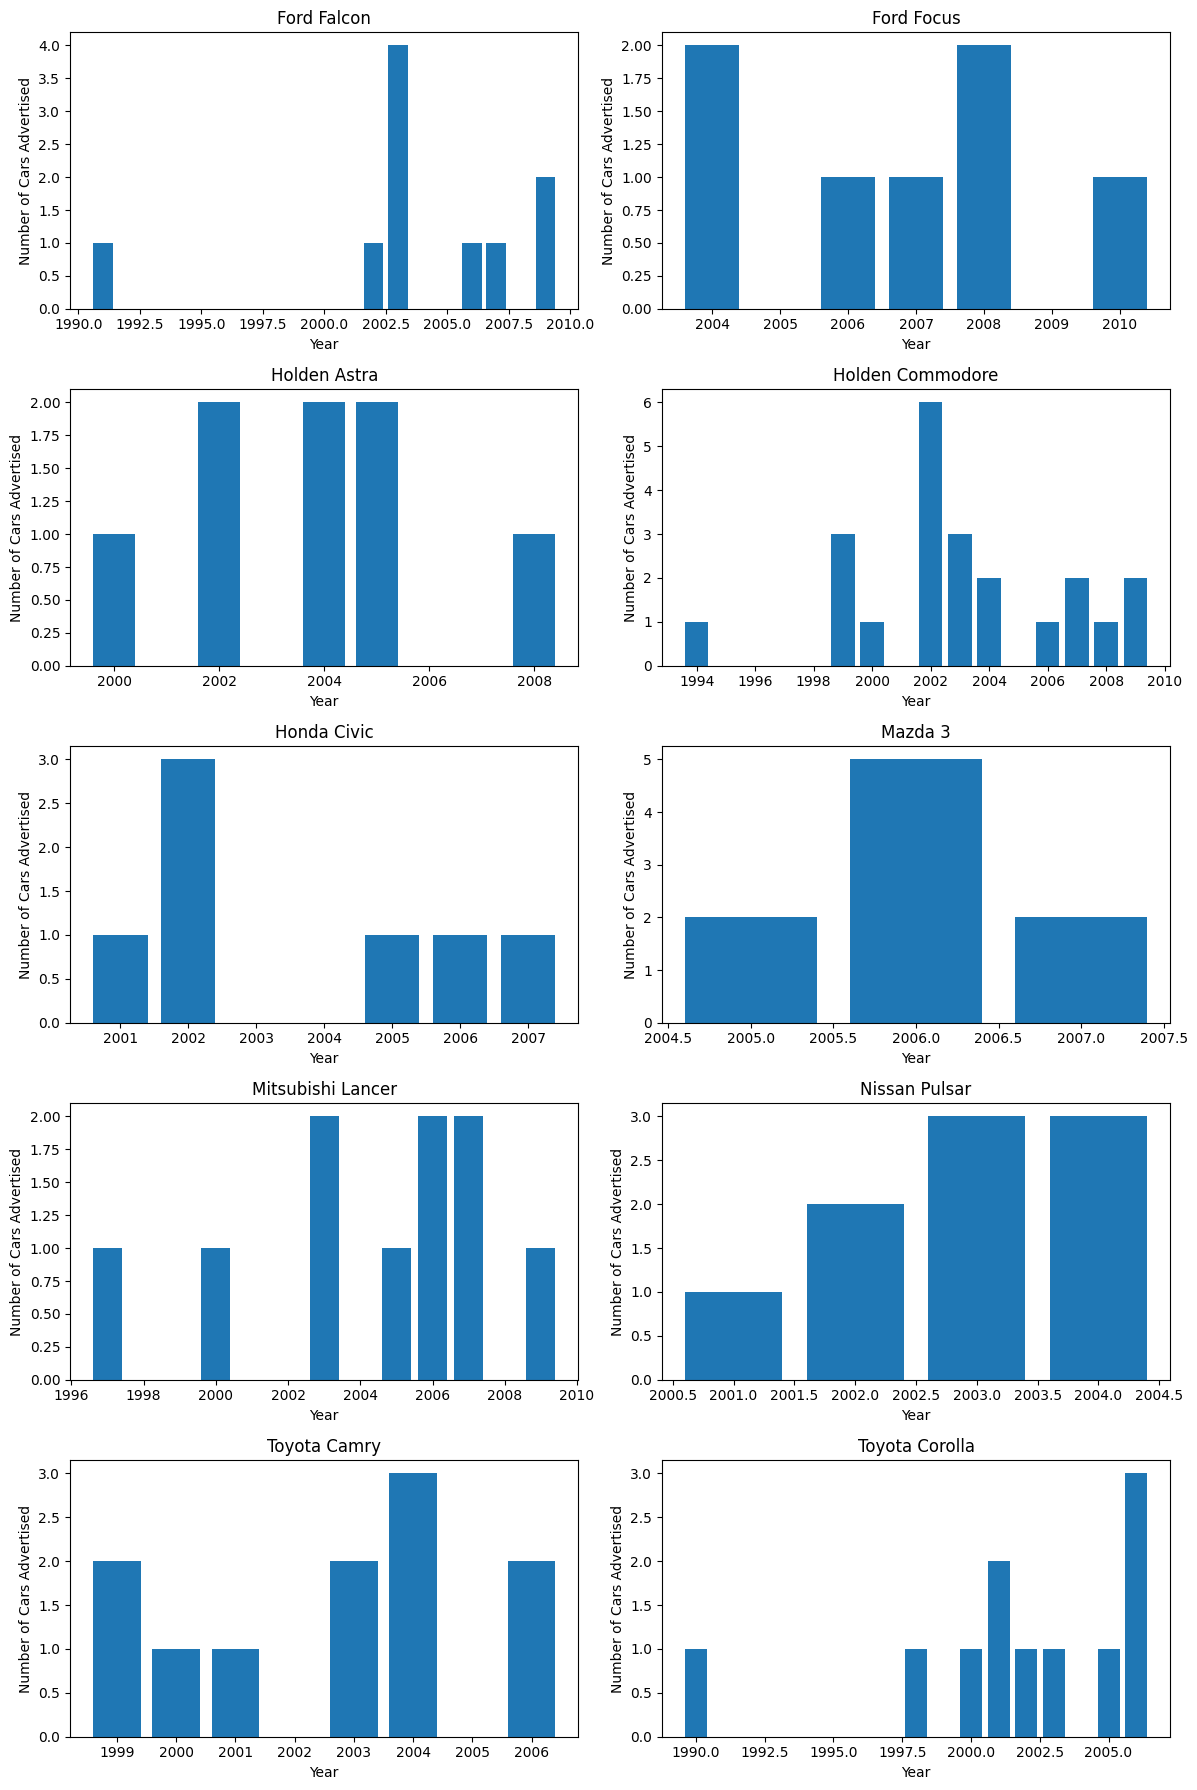

In [33]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(PlotDF2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = PlotDF2[PlotDF2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Count'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Number of Cars Advertised')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.2.2.2. Without outliers

In [34]:
# getting all brands and models to filter the data set
brands_limit_no_outliers = [x[0] for x in UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]
models_limit_no_outliers = [x[1] for x in UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]

# creating a variable with the dataframe filtered
Top10_Limit_NoOutliers = UsedCars_no_outliers[(UsedCars_no_outliers['Brand'].isin(brands_limit_no_outliers)) & 
                                              (UsedCars_no_outliers['Model'].isin(models_limit_no_outliers)) & 
                                              (UsedCars_no_outliers.Price <= 5000)]

# with limitation

UsedCars_no_outliers[UsedCars_no_outliers.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10) 

<ipython-input-34-44fef7220b72>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brands_limit_no_outliers = [x[0] for x in UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]
<ipython-input-34-44fef7220b72>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  models_limit_no_outliers = [x[1] for x in UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10).index]


Brand       Model    
Holden      Commodore    16
Mitsubishi  Lancer       10
Mazda       3             9
Toyota      Camry         9
            Corolla       9
Nissan      Pulsar        8
Ford        Falcon        7
            Focus         7
Holden      Astra         7
Honda       Civic         7
dtype: int64

In [35]:
Top10_Limit_NoOutliers.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
140,12688520,2006 Honda Civic VTI 40,4500,Honda,Civic,VTI,40,2006,229200,Sedan,Automatic,Unleaded Petrol,Used,1799,Silver,5
205,12689727,2001 Nissan Pulsar Q N16,4000,Nissan,Pulsar,Q,N16,2001,255000,Sedan,Automatic,Unleaded Petrol,Used,1769,Other,5
241,12690479,2006 Toyota Camry Altise ACV40R,3500,Toyota,Camry,Altise,ACV40R,2006,199000,Sedan,Automatic,Unleaded Petrol,Used,2362,Blue,5
589,12696562,2002 Nissan Pulsar ST N16,3475,Nissan,Pulsar,ST,N16,2002,215571,Sedan,Automatic,Unleaded Petrol,Used,1769,Brown,5
599,12696750,2007 Honda Civic VTI MY07,4250,Honda,Civic,VTI,MY07,2007,215000,Sedan,Manual,Unleaded Petrol,Used,1799,Black,5


##### 3.2.2.3 What's the difference between them?

Again, it appears that the cars have remained unchanged, with just a small decrease in their quantity, as outlined below.

In [36]:
(UsedCars[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10) -
 UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10)).sort_values(ascending=False)

<ipython-input-36-b2f31076d95b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UsedCars_no_outliers[UsedCars.Price <= 5000].groupby(['Brand','Model']).size().nlargest(10)).sort_values(ascending=False)


Brand       Model    
Holden      Commodore    6
Ford        Falcon       3
Toyota      Camry        2
            Corolla      2
Holden      Astra        1
Nissan      Pulsar       1
Ford        Focus        0
Honda       Civic        0
Mazda       3            0
Mitsubishi  Lancer       0
dtype: int64

### 3.3. What's the average  mileage of these cars?

For this one we will analyse the whole dataset but also the dataser without the outliers to see how the outliers influence our analyses.

#### 3.3.1. With no budget limitation

Without the limit of $5000, which is my budget to buy a car.

##### 3.3.1.1. With outliers

Taking into account the outliers we saw at the beginning of our analysis.

In [37]:
# creatting the dataframe with the 10 most advertised cars with no budget limitation
AverageMi = Top10_NoLimit.copy()

# creating a new colunm with the brand and model together
AverageMi['Brand_Model'] = AverageMi[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
AverageMi = AverageMi.loc[:, ['Brand_Model', 'Kilometers']]

# grouping the dataset with the average kilometers per brand/model
AverageMi = AverageMi.groupby('Brand_Model')['Kilometers'].mean().round(2)

AverageMi.sort_values(ascending=False)

Brand_Model
Holden Commodore     160397.44
Nissan Navara        156777.63
Mitsubishi Triton    143819.43
Holden Colorado      137651.23
Toyota Hilux         130441.48
Ford Ranger          114078.24
Mazda 3              110472.93
Nissan X-Trail        98234.26
Toyota Corolla        89630.62
Toyota RAV4           82331.67
Name: Kilometers, dtype: float64

In [38]:
# creatting the dataframe with the 10 most advertised cars
AverageMi2 = Top10_NoLimit.copy()

# creating a new colunm with the brand and model together
AverageMi2['Brand_Model'] = AverageMi2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
AverageMi2 = AverageMi2.loc[:, ['Brand_Model', 'Year', 'Kilometers']]

# grouping the dataset and adding a colunm with the average kilometers per brand/model and Year
AverageMi2 = AverageMi2.groupby(['Brand_Model', 'Year'])['Kilometers'].mean().round(2).reset_index(name='Average_Mileage')

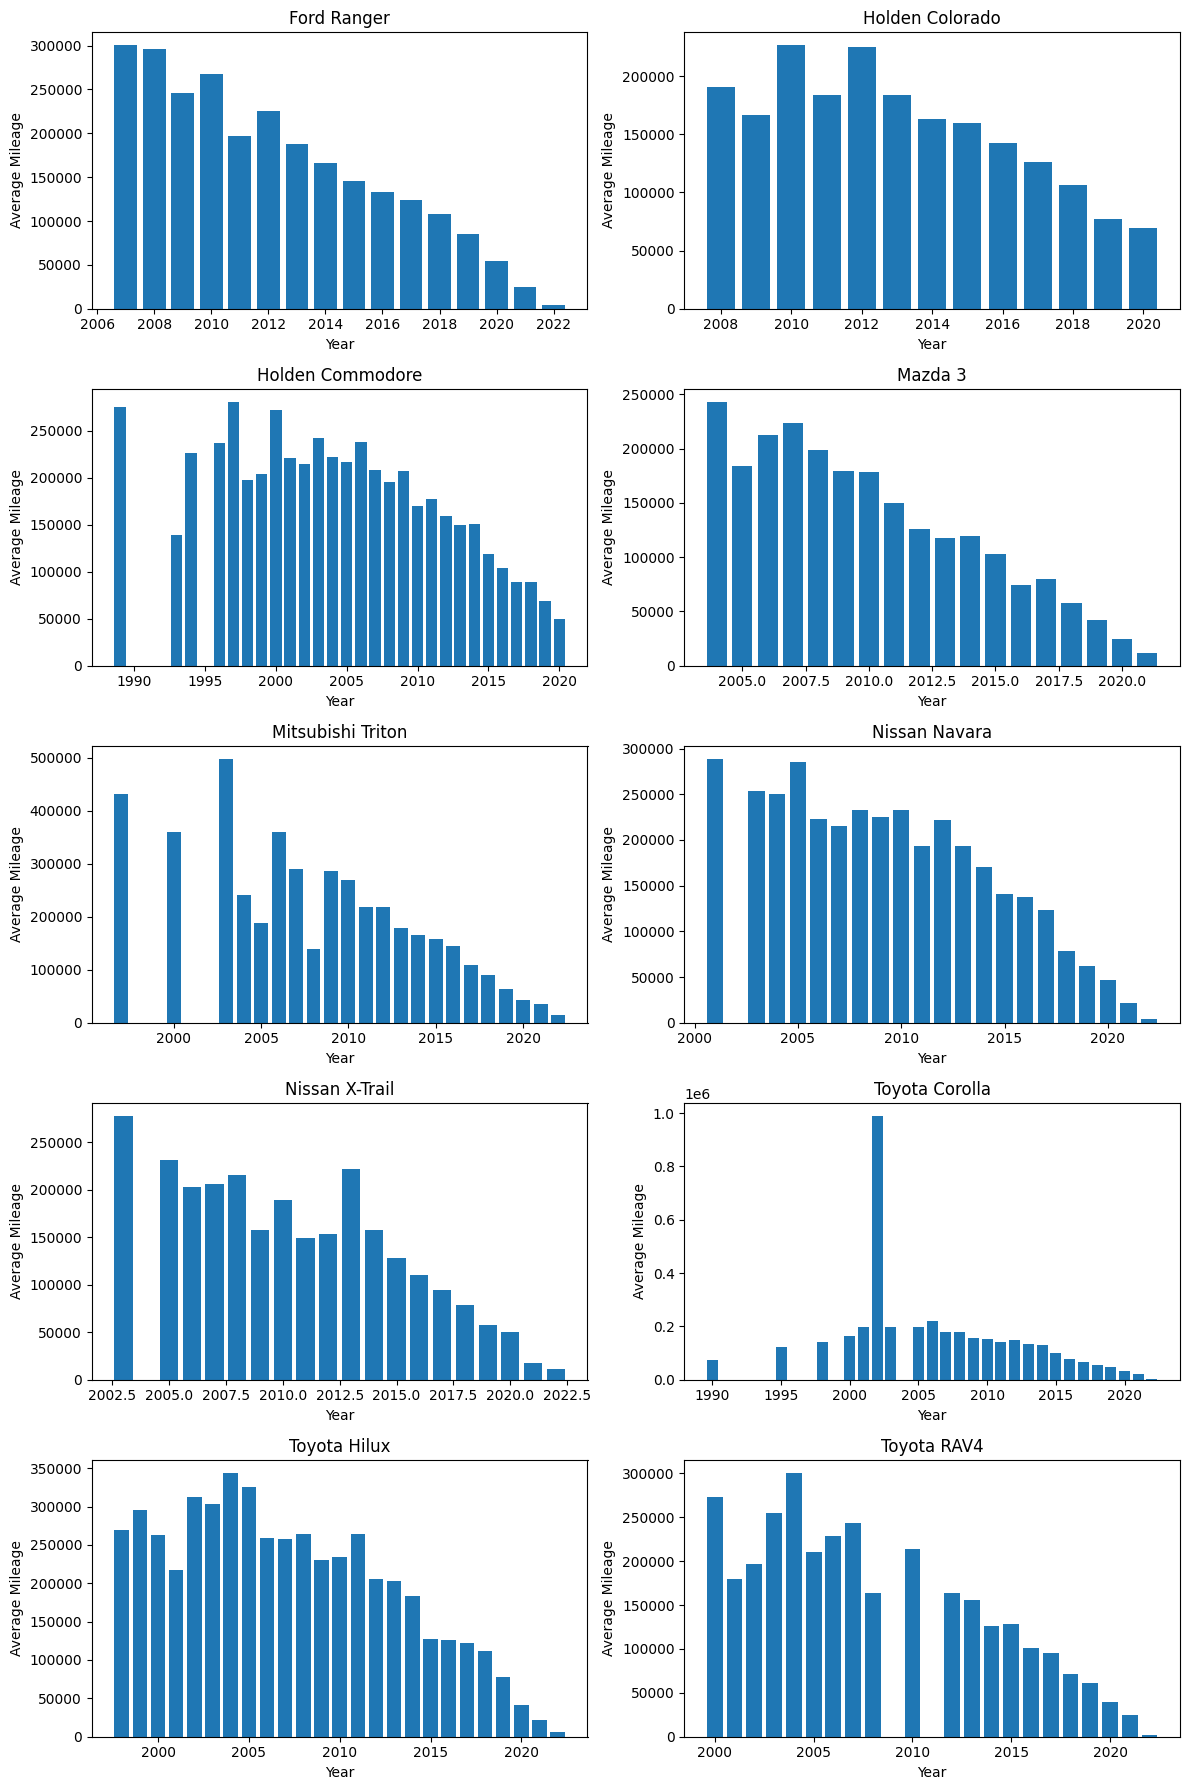

In [39]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(AverageMi2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = AverageMi2[AverageMi2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Average_Mileage'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Mileage')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.3.1.2 Without outliers


In [40]:
# now let's filter the dataset based on the upper and lower number calculated above

average_no_limit = Top10_NoLimit_NoOutliers.copy()

# now that we have the filtered dataset, let's continue

In [41]:
# creatting the dataframe with the 10 most advertised cars with no budget limitation
Average_No_Limit = average_no_limit.copy()

# creating a new colunm with the brand and model together
Average_No_Limit['Brand_Model'] = Average_No_Limit[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
Average_No_Limit = Average_No_Limit.loc[:, ['Brand_Model', 'Kilometers']]

# grouping the dataset with the average kilometers per brand/model
Average_No_Limit = Average_No_Limit.groupby('Brand_Model')['Kilometers'].mean().round(2)

Average_No_Limit.sort_values(ascending=False)

Brand_Model
Holden Commodore     156594.46
Nissan Navara        145112.26
Holden Colorado      134461.59
Mitsubishi Triton    129792.97
Toyota Hilux         121046.95
Ford Ranger          110964.13
Mazda 3              110199.43
Nissan X-Trail        98234.26
Toyota Corolla        85022.52
Toyota RAV4           79171.05
Name: Kilometers, dtype: float64

In [42]:
# creatting the dataframe with the 10 most advertised cars
Average_No_Limit2 = average_no_limit.copy()

# creating a new colunm with the brand and model together
Average_No_Limit2['Brand_Model'] = Average_No_Limit2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
Average_KM_Limit2 = Average_No_Limit2.loc[:, ['Brand_Model', 'Year', 'Kilometers']]

# grouping the dataset and adding a colunm with the average kilometers per brand/model and Year
Average_No_Limit2 = Average_No_Limit2.groupby(['Brand_Model', 'Year'])['Kilometers'].mean().round(2).reset_index(name='Average_Mileage')

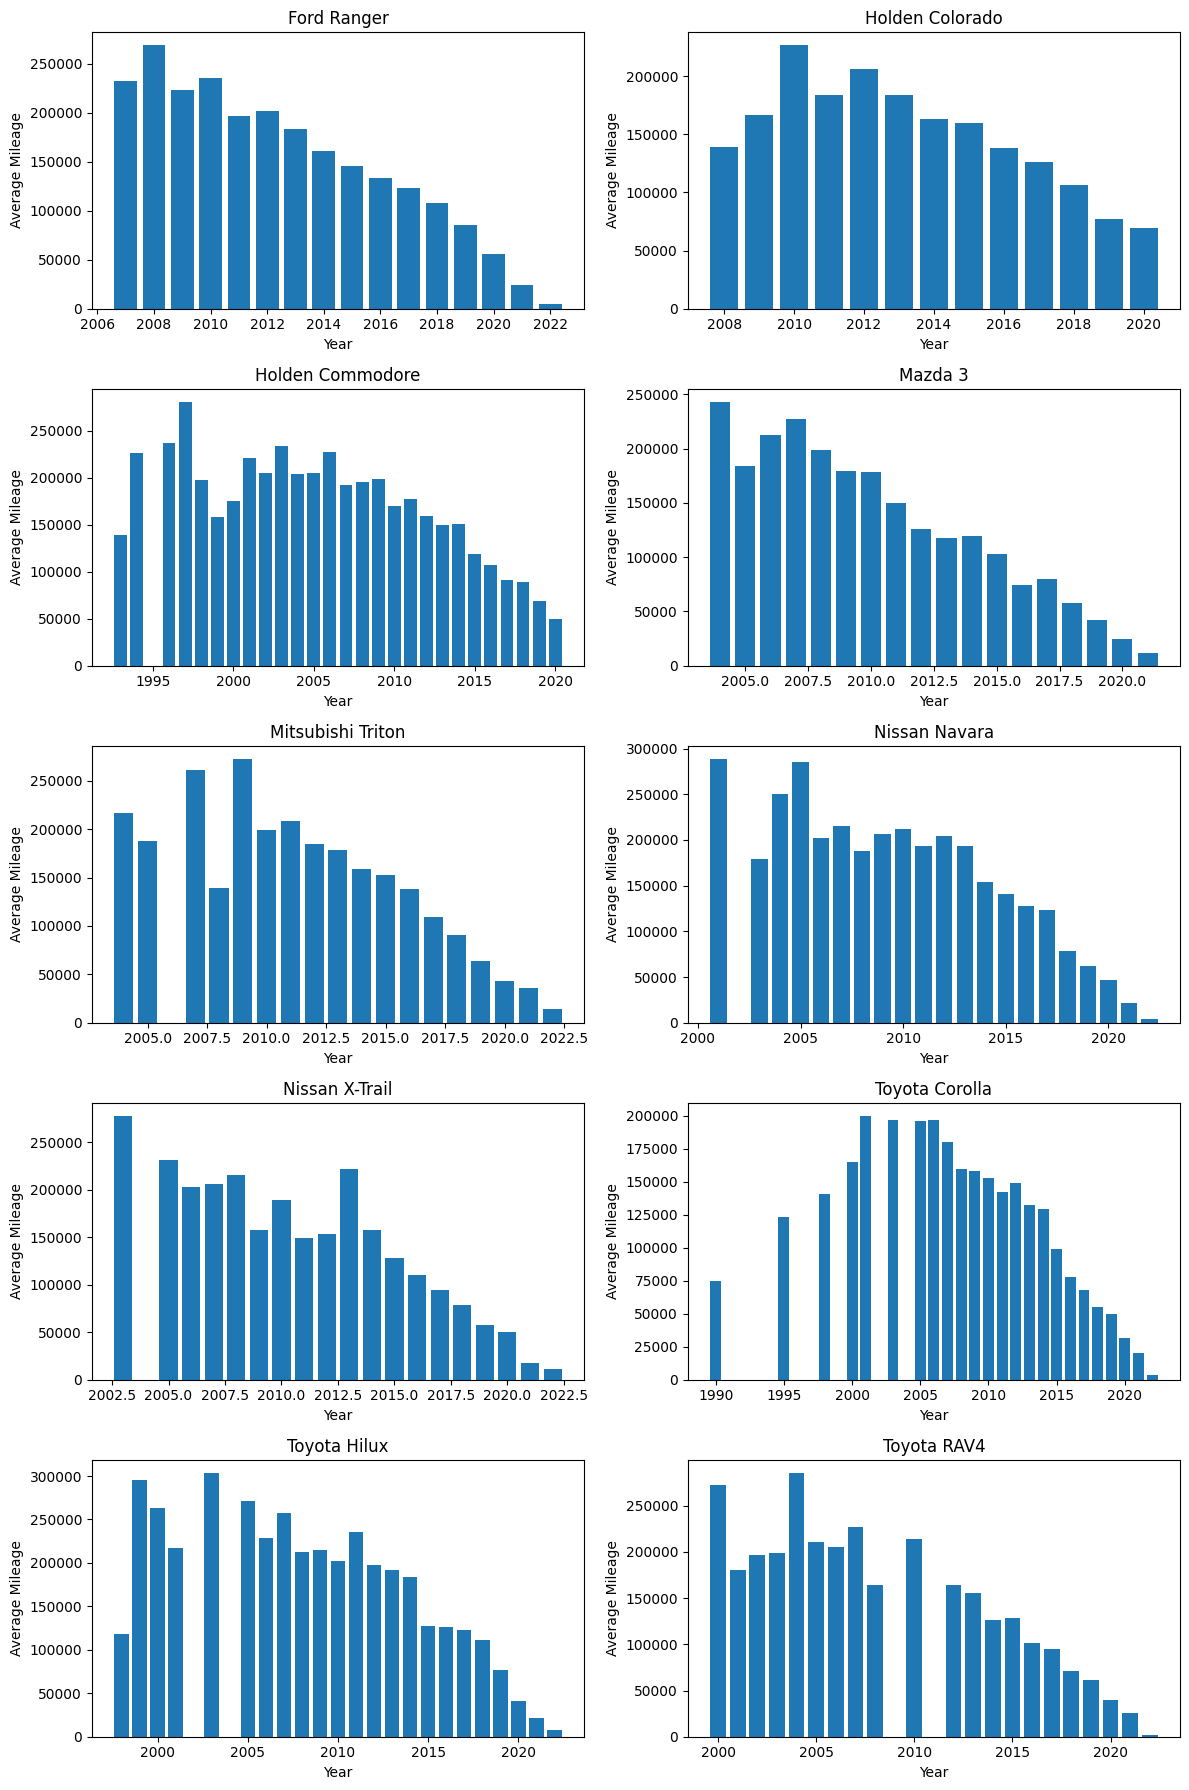

In [43]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(Average_No_Limit2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = Average_No_Limit2[Average_No_Limit2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Average_Mileage'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Mileage')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.3.1.3. What's the difference between them?

We can see that it decreased a little bit but it didn't make much difference. Let's see below how much was the difference.

In [44]:
AverageMi # with outliers

Brand_Model
Ford Ranger          114078.24
Holden Colorado      137651.23
Holden Commodore     160397.44
Mazda 3              110472.93
Mitsubishi Triton    143819.43
Nissan Navara        156777.63
Nissan X-Trail        98234.26
Toyota Corolla        89630.62
Toyota Hilux         130441.48
Toyota RAV4           82331.67
Name: Kilometers, dtype: float64

In [45]:
Average_No_Limit # with no outliers

Brand_Model
Ford Ranger          110964.13
Holden Colorado      134461.59
Holden Commodore     156594.46
Mazda 3              110199.43
Mitsubishi Triton    129792.97
Nissan Navara        145112.26
Nissan X-Trail        98234.26
Toyota Corolla        85022.52
Toyota Hilux         121046.95
Toyota RAV4           79171.05
Name: Kilometers, dtype: float64

In [46]:
(AverageMi - Average_No_Limit).sort_values(ascending=False)

Brand_Model
Mitsubishi Triton    14026.46
Nissan Navara        11665.37
Toyota Hilux          9394.53
Toyota Corolla        4608.10
Holden Commodore      3802.98
Holden Colorado       3189.64
Toyota RAV4           3160.62
Ford Ranger           3114.11
Mazda 3                273.50
Nissan X-Trail           0.00
Name: Kilometers, dtype: float64

#### 3.3.2 With budget limitation

Now, analysing it with my budget limitation of $5.000.

##### 3.3.2.1 With outliers

In [47]:
# creatting the dataframe with the 10 most advertised cars with budget limitation
AvgMi = Top10_Limit.copy()

# creating a new colunm with the brand and model together
AvgMi['Brand_Model'] = AvgMi[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
AvgMi = AvgMi.loc[:, ['Brand_Model', 'Kilometers']]

# grouping the dataset with the average kilometers per brand/model
AvgMi = AvgMi.groupby('Brand_Model')['Kilometers'].mean().round(2)

AvgMi.sort_values(ascending=False)

Brand_Model
Toyota Corolla       288143.91
Ford Falcon          281036.90
Holden Commodore     262627.18
Toyota Camry         242212.45
Nissan Pulsar        238363.89
Ford Focus           228063.14
Holden Astra         220743.88
Mazda 3              219312.33
Mitsubishi Lancer    218693.80
Honda Civic          200333.86
Name: Kilometers, dtype: float64

As the number of cars within the budget range is low, I will not plot it on the bar graph.

##### 3.3.2.2 Without outliers

In [48]:
# now let's filter the dataset based on the upper and lower number calculated above

average_limit = Top10_Limit_NoOutliers.copy()

# now that we have the filtered dataset, let's continue

In [49]:
# creatting the dataframe with the 10 most advertised cars with budget limitation
Average_KM_Limit = average_limit.copy()

# creating a new colunm with the brand and model together
Average_KM_Limit['Brand_Model'] = Average_KM_Limit[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
Average_KM_Limit = Average_KM_Limit.loc[:, ['Brand_Model', 'Kilometers']]

# grouping the dataset with the average kilometers per brand/model
Average_KM_Limit = Average_KM_Limit.groupby('Brand_Model')['Kilometers'].mean().round(2)

Average_KM_Limit.sort_values(ascending=False)

Brand_Model
Holden Commodore     230533.00
Ford Focus           228063.14
Toyota Camry         224463.78
Ford Falcon          219767.00
Mazda 3              219312.33
Mitsubishi Lancer    218693.80
Nissan Pulsar        210401.50
Toyota Corolla       202529.22
Honda Civic          200333.86
Holden Astra         196850.86
Name: Kilometers, dtype: float64

##### 3.3.2.3 What's the difference between them?

In [50]:
AvgMi # with outliers

Brand_Model
Ford Falcon          281036.90
Ford Focus           228063.14
Holden Astra         220743.88
Holden Commodore     262627.18
Honda Civic          200333.86
Mazda 3              219312.33
Mitsubishi Lancer    218693.80
Nissan Pulsar        238363.89
Toyota Camry         242212.45
Toyota Corolla       288143.91
Name: Kilometers, dtype: float64

In [51]:
Average_KM_Limit # with no outliers

Brand_Model
Ford Falcon          219767.00
Ford Focus           228063.14
Holden Astra         196850.86
Holden Commodore     230533.00
Honda Civic          200333.86
Mazda 3              219312.33
Mitsubishi Lancer    218693.80
Nissan Pulsar        210401.50
Toyota Camry         224463.78
Toyota Corolla       202529.22
Name: Kilometers, dtype: float64

In [52]:
# difference between the data with outliers and without it

(AvgMi - Average_KM_Limit).sort_values(ascending=False)

Brand_Model
Toyota Corolla       85614.69
Ford Falcon          61269.90
Holden Commodore     32094.18
Nissan Pulsar        27962.39
Holden Astra         23893.02
Toyota Camry         17748.67
Ford Focus               0.00
Honda Civic              0.00
Mazda 3                  0.00
Mitsubishi Lancer        0.00
Name: Kilometers, dtype: float64

It is evident that there is a significant difference, particularly in the first three instances. The Toyota Corolla, for instance, has a difference of over 85,000 kilometres.

### 3.4. What's the average price of these cars?

We are going to maintain the approach of the last question, analysing it with and without budget and outliers.

#### 3.4.1. With no budget limitation

##### 3.4.1.1. With outliers

In [53]:
# creatting the dataframe with the 10 most advertised cars with no budget limitation
avg_price_no_limit = Top10_NoLimit.copy()

# creating a new colunm with the brand and model together
avg_price_no_limit['Brand_Model'] = avg_price_no_limit[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
avg_price_no_limit = avg_price_no_limit.loc[:, ['Brand_Model', 'Price']]

# grouping the dataset with the average kilometers per brand/model
avg_price_no_limit = avg_price_no_limit.groupby('Brand_Model')['Price'].mean().round(2)

avg_price_no_limit.sort_values(ascending=False)

Brand_Model
Ford Ranger          45788.95
Toyota Hilux         41918.44
Toyota RAV4          37975.99
Holden Colorado      34579.39
Mitsubishi Triton    30277.25
Nissan Navara        29683.67
Nissan X-Trail       25953.66
Toyota Corolla       24027.83
Holden Commodore     23984.17
Mazda 3              20196.54
Name: Price, dtype: float64

Now the visualisation of the cars by year. Let's see how they are distributed.

In [54]:
# creatting the dataframe with the 10 most advertised cars
avg_price_no_limit2 = Top10_NoLimit.copy()

# creating a new colunm with the brand and model together
avg_price_no_limit2['Brand_Model'] = avg_price_no_limit2[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
avg_price_no_limit2 = avg_price_no_limit2.loc[:, ['Brand_Model', 'Year', 'Price']]

# grouping the dataset and adding a colunm with the average kilometers per brand/model and Year
avg_price_no_limit2 = avg_price_no_limit2.groupby(['Brand_Model', 'Year'])['Price'].mean().round(2).reset_index(name='Average_Price')

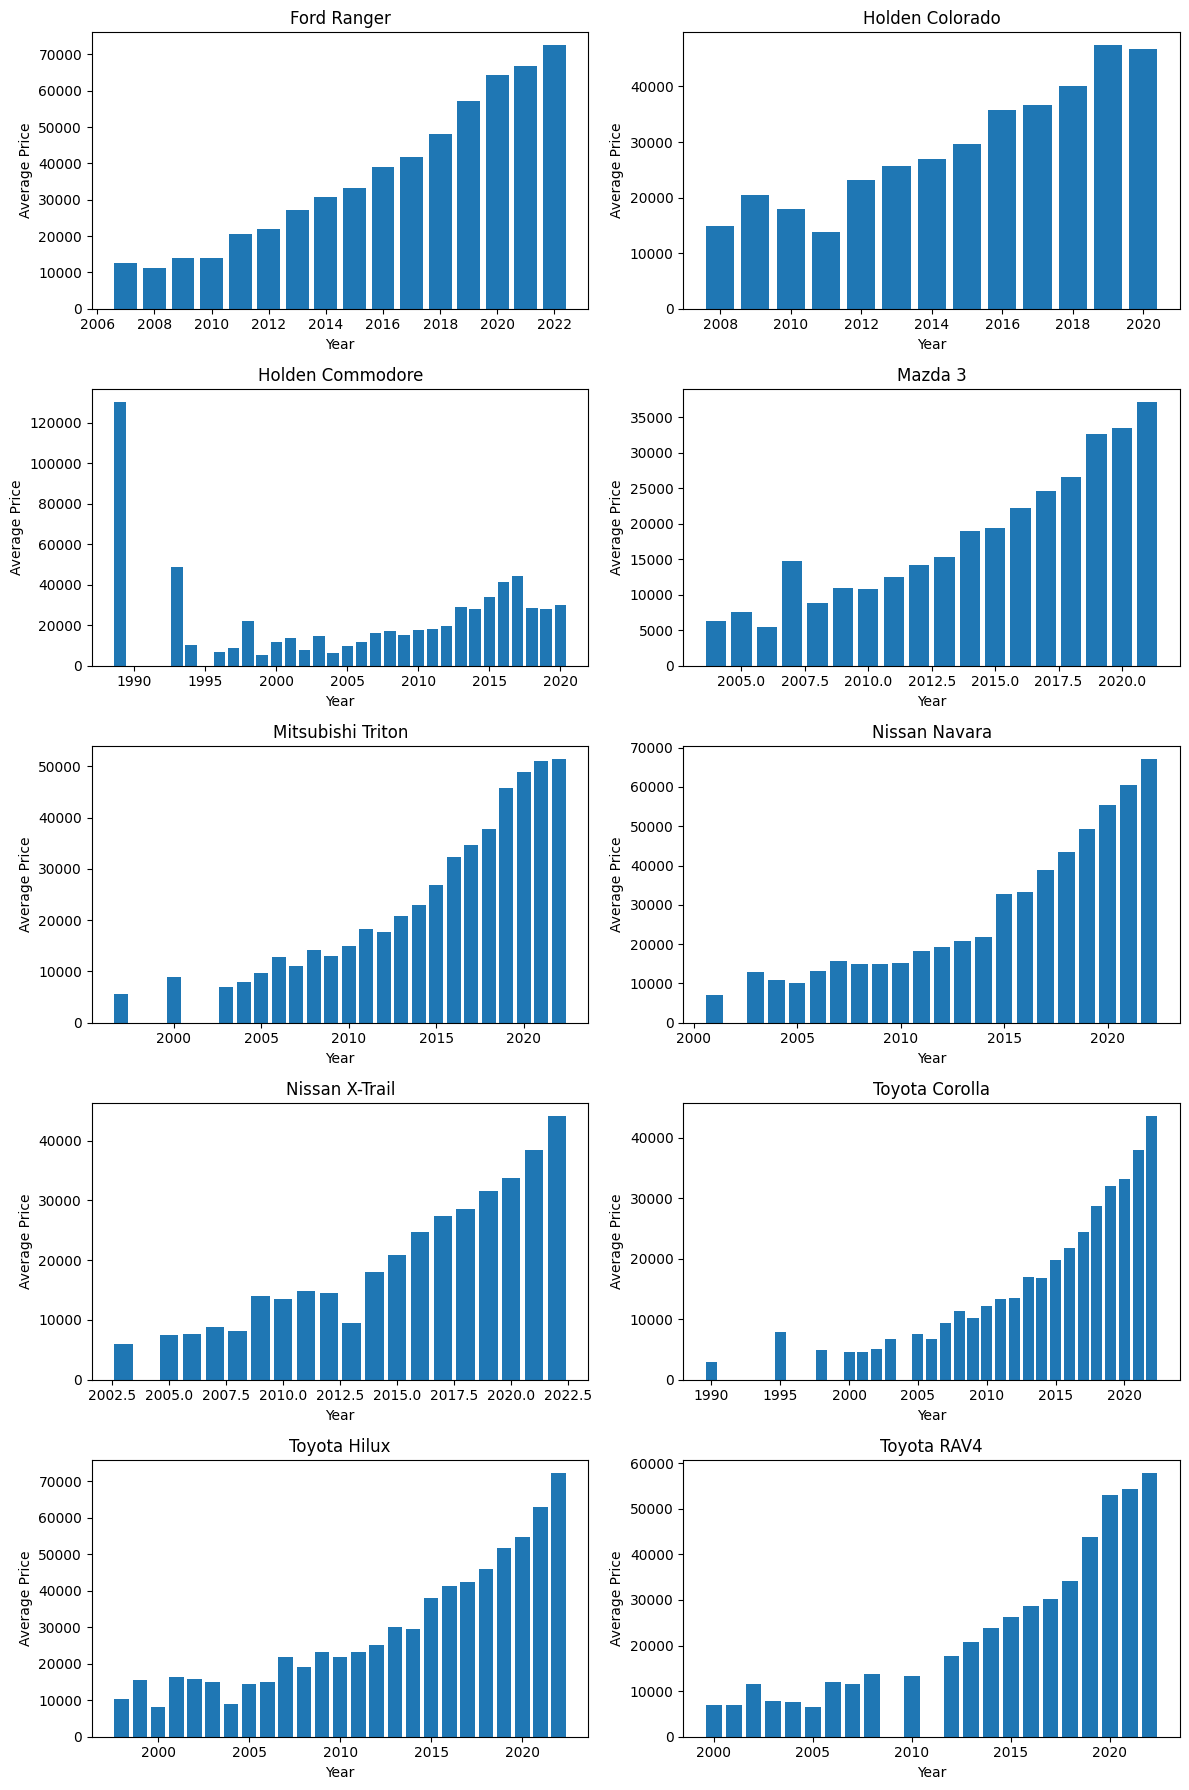

In [55]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(avg_price_no_limit2['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = avg_price_no_limit2[avg_price_no_limit2['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Average_Price'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.4.1.2. Without outliers

In [56]:
# now let's filter the dataset based on the upper and lower number calculated above

priceavg_no_limit = Top10_NoLimit_NoOutliers.copy()

# now that we have the filtered dataset, let's continue

In [57]:
# creatting the dataframe with the average price of the 10 most advertised cars with no budget limitation
avg_price_no_limit3 = priceavg_no_limit.copy()

# creating a new colunm with the brand and model together
avg_price_no_limit3['Brand_Model'] = avg_price_no_limit3[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
avg_price_no_limit3 = avg_price_no_limit3.loc[:, ['Brand_Model', 'Price']]

# grouping the dataset with the average kilometers per brand/model
avg_price_no_limit3 = avg_price_no_limit3.groupby('Brand_Model')['Price'].mean().round(2)

avg_price_no_limit3.sort_values(ascending=False)

Brand_Model
Ford Ranger          45768.97
Toyota Hilux         42408.36
Toyota RAV4          38365.87
Holden Colorado      34804.76
Mitsubishi Triton    31470.06
Nissan Navara        30712.59
Nissan X-Trail       25953.66
Toyota Corolla       24228.48
Holden Commodore     23880.44
Mazda 3              19882.46
Name: Price, dtype: float64

In [58]:
# creatting the dataframe with the 10 most advertised cars
avg_price_no_limit4 = priceavg_no_limit.copy()

# creating a new colunm with the brand and model together
avg_price_no_limit4['Brand_Model'] = avg_price_no_limit4[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
avg_price_no_limit4 = avg_price_no_limit4.loc[:, ['Brand_Model', 'Year', 'Price']]

# grouping the dataset and adding a colunm with the average kilometers per brand/model and Year
avg_price_no_limit4 = avg_price_no_limit4.groupby(['Brand_Model', 'Year'])['Price'].mean().round(2).reset_index(name='Average_Price')

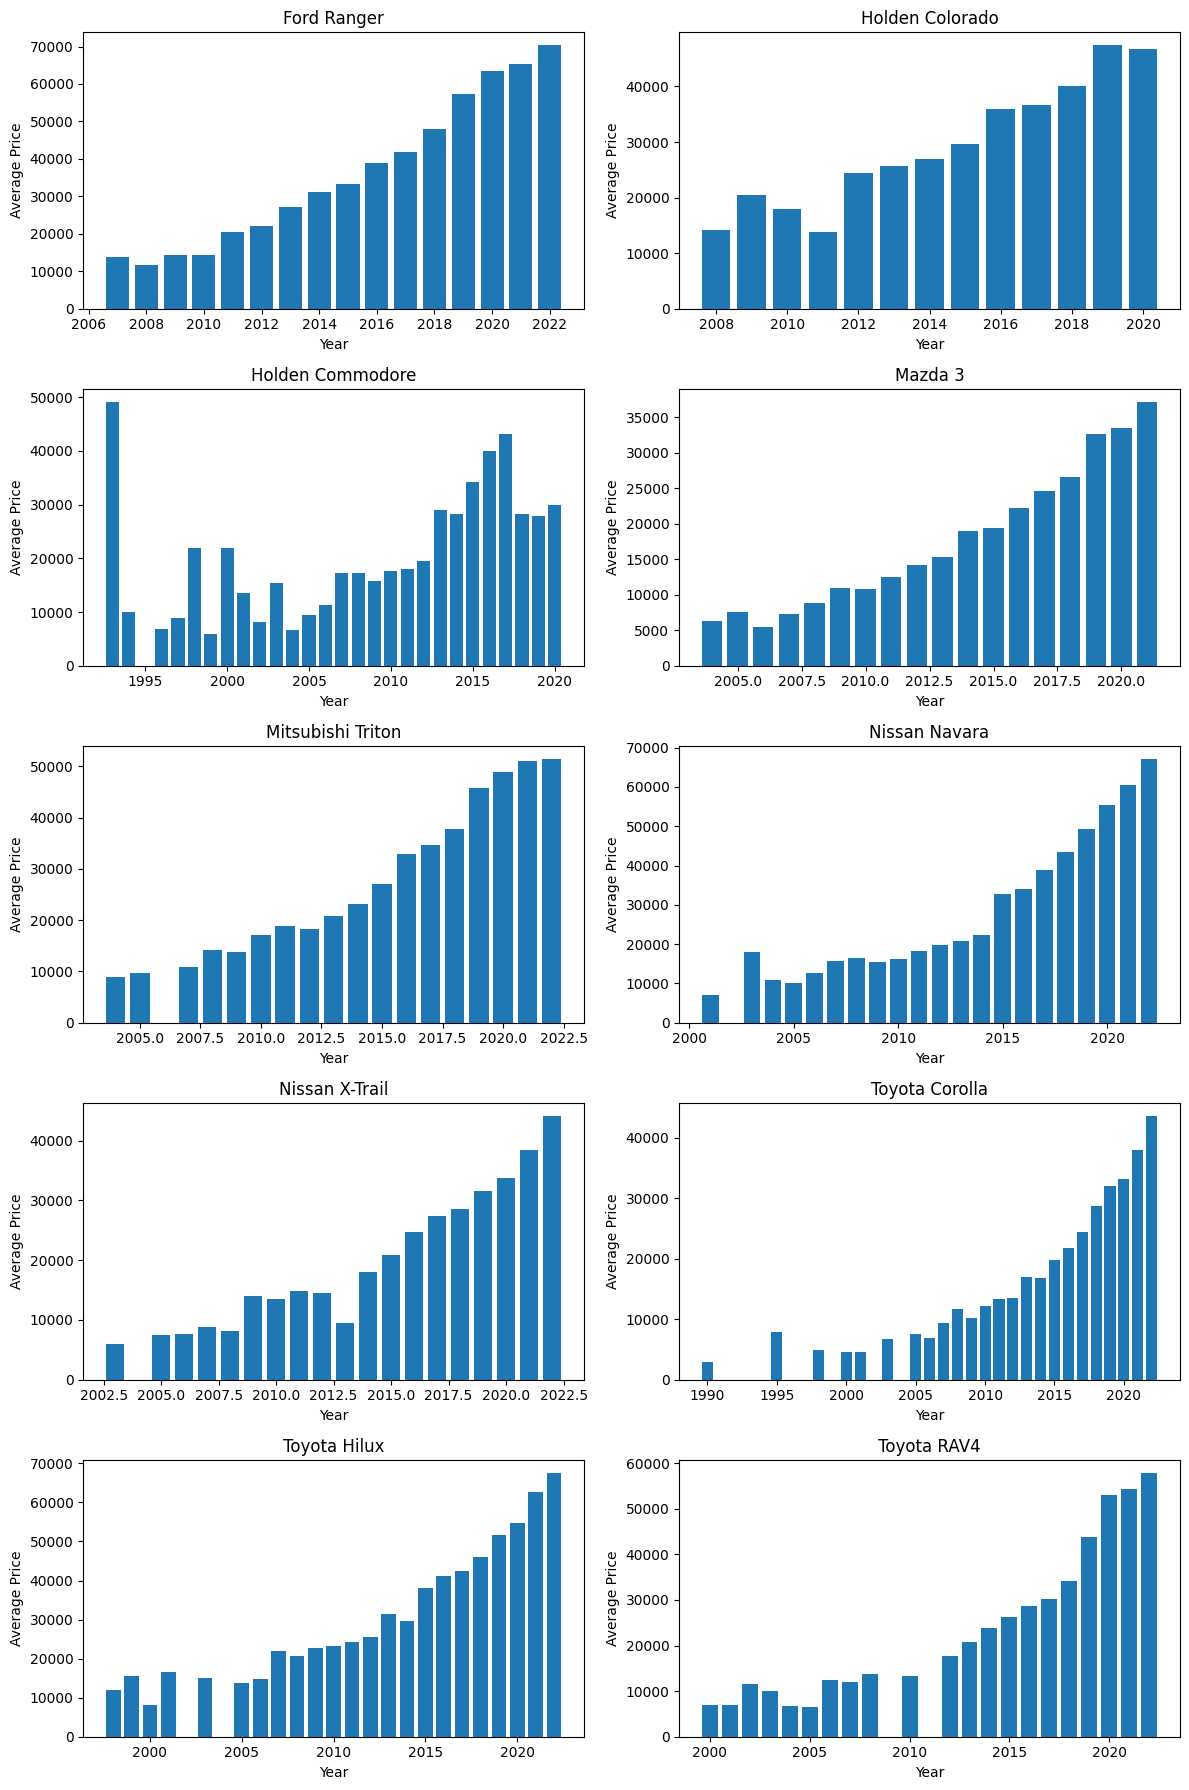

In [59]:
fig, axs = plt.subplots(5,2, figsize=(12, 18))

# Iterate over each Brand_Model
for i, brand_model in enumerate(avg_price_no_limit4['Brand_Model'].unique()):
    row = i // 2
    col = i % 2
    
    # Filter data for the current Brand_Model
    brand_model_data = avg_price_no_limit4[avg_price_no_limit4['Brand_Model'] == brand_model]
    
    # Plot the count per year 
    axs[row, col].bar(brand_model_data['Year'], brand_model_data['Average_Price'])
    axs[row, col].set_title(brand_model)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 3.4.1.3. What's the difference between them?

In [60]:
avg_price_no_limit # with outliers

Brand_Model
Ford Ranger          45788.95
Holden Colorado      34579.39
Holden Commodore     23984.17
Mazda 3              20196.54
Mitsubishi Triton    30277.25
Nissan Navara        29683.67
Nissan X-Trail       25953.66
Toyota Corolla       24027.83
Toyota Hilux         41918.44
Toyota RAV4          37975.99
Name: Price, dtype: float64

In [61]:
avg_price_no_limit3 # with no outliers

Brand_Model
Ford Ranger          45768.97
Holden Colorado      34804.76
Holden Commodore     23880.44
Mazda 3              19882.46
Mitsubishi Triton    31470.06
Nissan Navara        30712.59
Nissan X-Trail       25953.66
Toyota Corolla       24228.48
Toyota Hilux         42408.36
Toyota RAV4          38365.87
Name: Price, dtype: float64

In [62]:
# difference of the average price between the cars with and without outliers

(avg_price_no_limit - avg_price_no_limit3).sort_values(ascending=False)

Brand_Model
Mazda 3               314.08
Holden Commodore      103.73
Ford Ranger            19.98
Nissan X-Trail          0.00
Toyota Corolla       -200.65
Holden Colorado      -225.37
Toyota RAV4          -389.88
Toyota Hilux         -489.92
Nissan Navara       -1028.92
Mitsubishi Triton   -1192.81
Name: Price, dtype: float64

We can notice that in 6 cases the number increased when analysing the dataset without the outliers.

#### 3.4.2. With budget limitation

Since $5000 is entirely within the normal range, that is, they are not outliers, there won't be any difference between the data with and without outliers in this case.

In [63]:
# creatting the dataframe with the 10 most advertised cars with no budget limitation
avg_price_limit = Top10_Limit.copy()

# creating a new colunm with the brand and model together
avg_price_limit['Brand_Model'] = avg_price_limit[['Brand', 'Model']].apply(' '.join, axis=1)

# getting just the colunms we will use
avg_price_limit = avg_price_limit.loc[:, ['Brand_Model', 'Price']]

# grouping the dataset with the average kilometers per brand/model
avg_price_limit = avg_price_limit.groupby('Brand_Model')['Price'].mean().round(2)

avg_price_limit.sort_values(ascending=False)

Brand_Model
Mitsubishi Lancer    4338.40
Mazda 3              4268.00
Honda Civic          4128.43
Ford Focus           4121.14
Nissan Pulsar        4113.11
Toyota Corolla       4029.91
Holden Commodore     3999.32
Toyota Camry         3981.18
Ford Falcon          3892.00
Holden Astra         3088.62
Name: Price, dtype: float64